## **Naive Bayes Algorithm**

#### Problem Statement: Predicting Survival on the Titanic
The Titanic dataset contains information about the passengers on board the Titanic, including their demographic information and whether they survived or not. The goal of this project is to build a predictive model that can accurately predict whether a passenger survived or not based on the given features

In [1]:
import pandas as pd 
import numpy as nu 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


We will drop unwanted colums like 'PassengerId', 'Name', 'Ticket', 'Cabin' and 'Embarked' from the dataset. 

In [3]:
df_new = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked','Pclass'], axis='columns')
df_new

,Sex,Age,Fare,Survived
0,male,22.0,7.2500,0
1,female,38.0,71.2833,1
2,female,26.0,7.9250,1
3,female,35.0,53.1000,1
4,male,35.0,8.0500,0
...,...,...,...,...
886,male,27.0,13.0000,0
887,female,19.0,30.0000,1
888,female,NaN,23.4500,0
889,male,26.0,30.0000,1


There are some missing values in age columns. Hence, we will fill the missing values with mean of the column.

In [4]:
df_new.isnull().sum()

Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [5]:
df1 = df_new.fillna(df_new.Age.mean())
df1

,Sex,Age,Fare,Survived
0,male,22.000000,7.2500,0
1,female,38.000000,71.2833,1
2,female,26.000000,7.9250,1
3,female,35.000000,53.1000,1
4,male,35.000000,8.0500,0
...,...,...,...,...
886,male,27.000000,13.0000,0
887,female,19.000000,30.0000,1
888,female,29.699118,23.4500,0
889,male,26.000000,30.0000,1


Now, we will convert the categorical column (Sex) into numerical column.

In [6]:
df2 = pd.get_dummies(df1.Sex).astype(int)
df2

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [7]:
df3 = pd.concat([df1,df2],axis='columns')
df3

,Sex,Age,Fare,Survived,female,male
0,male,22.000000,7.2500,0,0,1
1,female,38.000000,71.2833,1,1,0
2,female,26.000000,7.9250,1,1,0
3,female,35.000000,53.1000,1,1,0
4,male,35.000000,8.0500,0,0,1
...,...,...,...,...,...,...
886,male,27.000000,13.0000,0,0,1
887,female,19.000000,30.0000,1,1,0
888,female,29.699118,23.4500,0,1,0
889,male,26.000000,30.0000,1,0,1


In [8]:
X=df3.drop(['Sex','Survived'],axis='columns')
X

,Age,Fare,female,male
0,22.000000,7.2500,0,1
1,38.000000,71.2833,1,0
2,26.000000,7.9250,1,0
3,35.000000,53.1000,1,0
4,35.000000,8.0500,0,1
...,...,...,...,...
886,27.000000,13.0000,0,1
887,19.000000,30.0000,1,0
888,29.699118,23.4500,1,0
889,26.000000,30.0000,0,1


In [9]:
y = df3.Survived
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

**Training and Spliting the data**

In [37]:
X_train, X_test , y_train ,y_test = train_test_split(df3.drop(['Sex','Survived'],axis='columns'),df3.Survived,test_size=0.2)

In [43]:
X_test

,Age,Fare,female,male
388,29.699118,7.7292,0,1
179,36.000000,0.0000,0,1
314,43.000000,26.2500,0,1
214,29.699118,7.7500,0,1
97,23.000000,63.3583,0,1
...,...,...,...,...
864,24.000000,13.0000,0,1
70,32.000000,10.5000,0,1
80,22.000000,9.0000,0,1
721,17.000000,7.0542,0,1


In [44]:
y_test

388    0
179    0
314    0
214    0
97     1
      ..
864    0
70     0
80     0
721    0
64     0
Name: Survived, Length: 179, dtype: int64

**Training the model**

In [38]:
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [39]:
nb.score(X_test,y_test)

0.8044692737430168

**Prediction and Confusion matrix**

In [40]:
y_pred = nb.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[100,  15],
       [ 20,  44]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

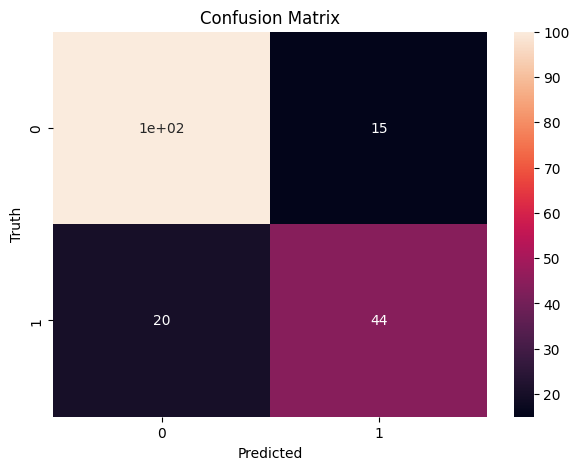

In [42]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       115
           1       0.75      0.69      0.72        64

    accuracy                           0.80       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.80      0.80      0.80       179

